In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

execluding courses: {'GEN185', 'IBS211', 'ANT302', 'ART121', 'COL150', 'ACC203', 'COL255', 'GEN120', 'ISU205', 'MKT210', 'COL130', 'ISL209', 'ACC202', 'GroupG', 'ENG367', 'FIN308', 'FLS361', 'GEN145', 'GroupD', 'ARA320', 'IAR210', 'MGT309', 'MTH214', 'ICB101', 'ENG360', 'ICS215', 'HSS255', 'HRM301', 'COL165', 'SOC341', 'ENG145', 'ARM240', 'ENG364', 'ARM395', 'GEN195', 'LAW200', 'IDS204', 'ART201', 'PSY212', 'ARA211', 'CHE201', 'ENG222', 'MTH213', 'PHY202', 'COL240', 'FYE195', 'IDS103', 'ENG365', 'FYE100', 'ARM375', 'IDS102', 'COL140', 'GEN150', 'SOC374', 'IAH244', 'HIS203', 'IDS101', 'ENV241', 'SOC326', 'FYE120', 'TCC371', 'ICS360', 'COL185', 'POL335', 'ART251', 'ENG368', 'ENV240', 'ARA380', 'GEN255', 'ISU204', 'COL135', 'ISS202', 'GEN130', 'ANT261', 'COL110', 'GEN110', 'ICB102', 'CHL100', 'GEN135', 'MKT433', 'BIO201', 'GEN175', 'EWS240', 'ARA130', 'POL227', 'MTH212', 'HIS204', 'ARA222', 'FYE140', 'ISL135', 'MTH215', 'COL145', 'HIS251', 'EDC207', 'PSY363', 'COL220', 'FYE146', 'IBS214',

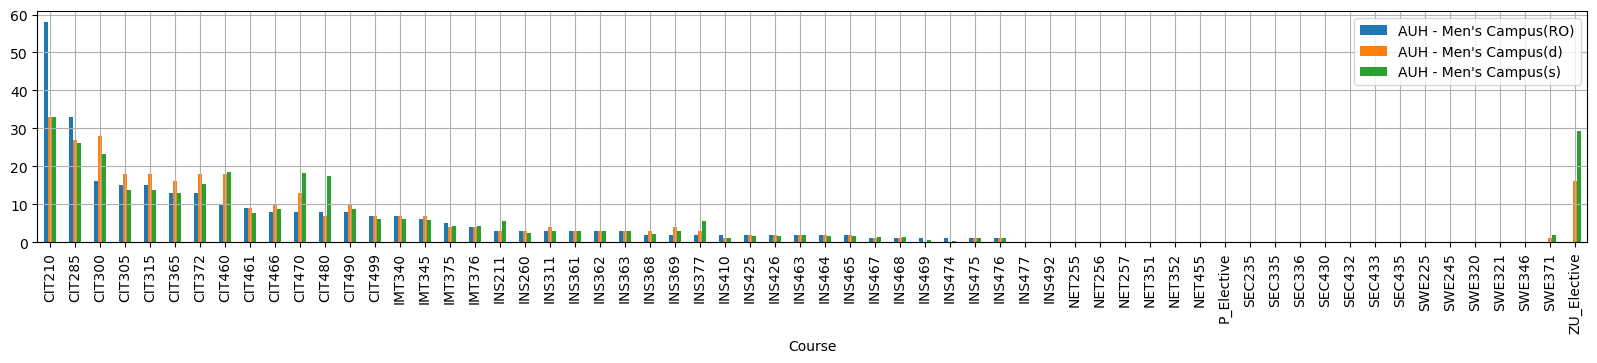

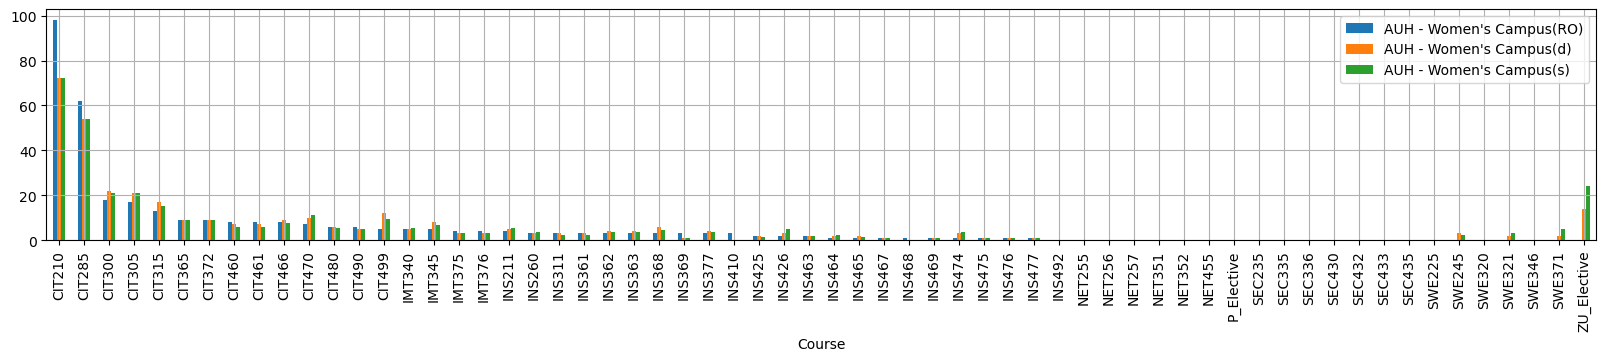

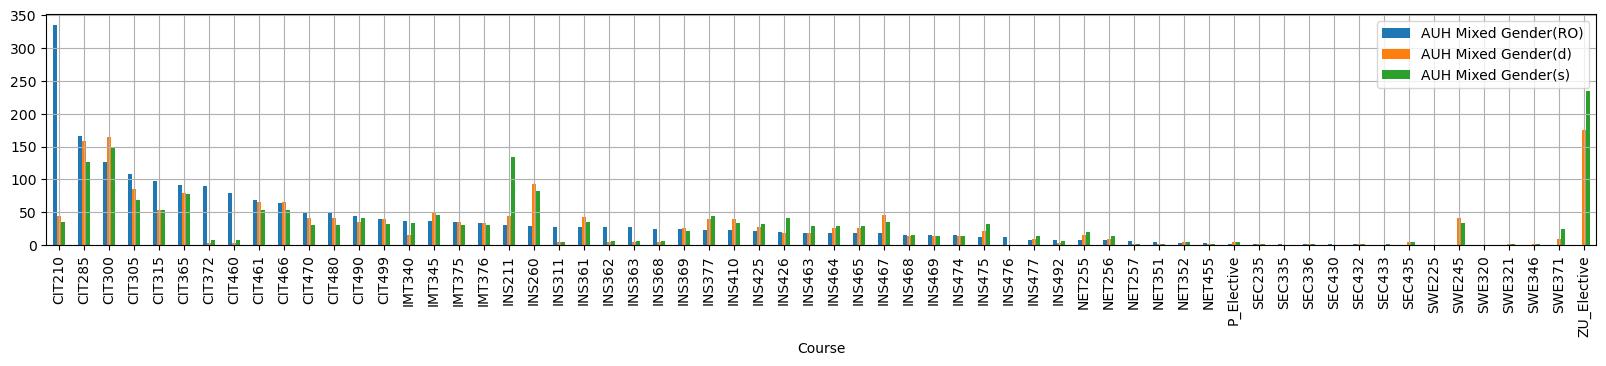

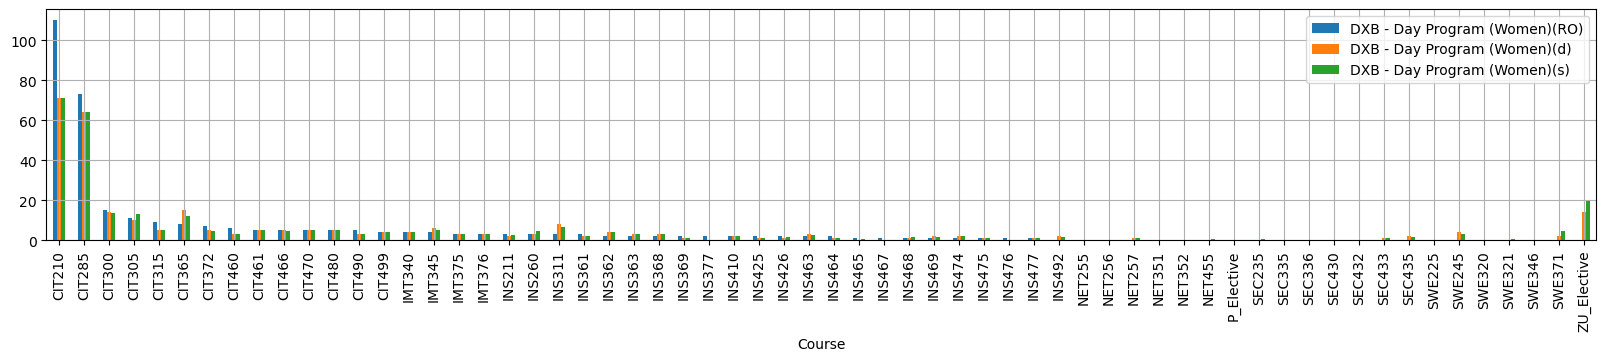

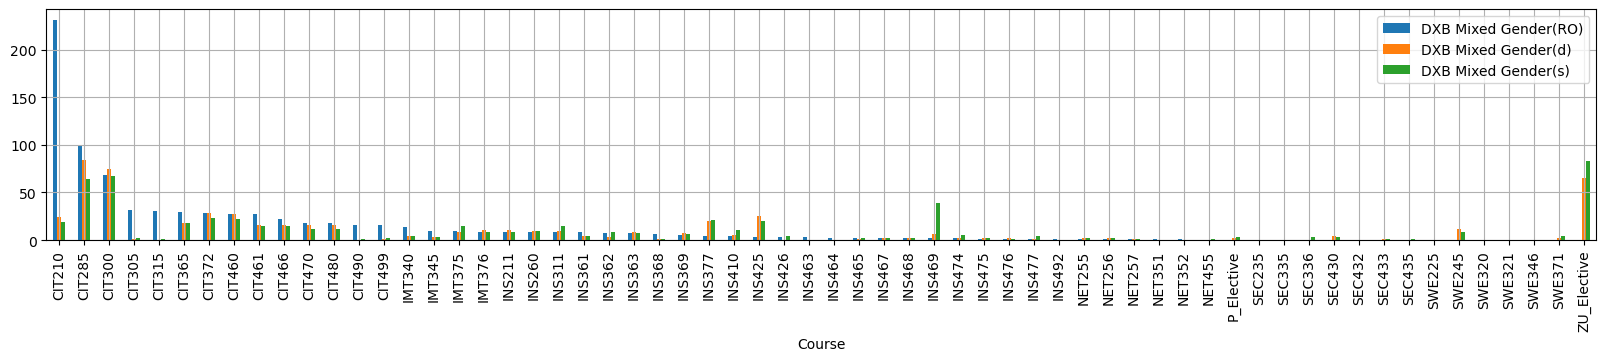

In [3]:
Forecast_files = {
                  'RO':'StudentsForecast_RO_summary_2025.03.06.xlsx',
                  'd': 'StudentsForecast_d_summary.xlsx',
                  's': 'StudentsForecast_s_summary.xlsx'
                }

data = []
for k, v in Forecast_files.items():
    data.append(pd.read_excel(v))
    data[-1].columns = [f'{c}({k})' for c in data[-1].columns]
    data[-1].rename(columns={f'Unnamed: 0({k})':'Course'}, inplace=True)

mask_text = 'CIT|INS|SEC|NET|SWE|IMT|ZU_Elective|P_Elective'
for i, d in enumerate(data):
    if i == 0:
        df = d
    else:
        df = pd.merge(df, d, on='Course', how='outer')
print(f"execluding courses: {set(df[~df['Course'].str.contains(mask_text)]['Course'])}")
df = df[df['Course'].str.contains(mask_text)]

columns = []
for n,c in enumerate(data[-1].columns):
    if n==0: 
        continue
    tmp = ['Course']
    for d in data:
        tmp.append(d.columns[n])
    columns.append(tmp)  
        
# display(columns)
# display(df)

for n,x in enumerate(columns):
    ax = df.loc[:,x].sort_values(by=x[1], ascending=False).plot.bar(x=x[0], figsize=(20,3), rot=90)
    plt.xticks(np.arange(len(df.iloc[:,0])), df.iloc[:,0])
    plt.grid(True)
    plt.show()
        